## How-to: Reshaping data

You will often need to change the shape of a dataset. For example, in order to merge data or visualise it. In this lab, we will show how to quickly change the shape from long-to-wide format, with the pivot function, and from wide-to-long with the melt and stack functions. 

A full explanation of the reshaping capabilities in Pandas can be found in the [Pandas how-to](https://pandas.pydata.org/docs/user_guide/reshaping.html)

We'll start by loading in a dataset from the [SSB API ready-made datasets](https://data.ssb.no/api/?lang=en) of population in Norwegian municipalities.

See the [how-to on working with ssb data](https://nbviewer.org/url/jmaurit.github.io/anv_statistikk/SSB_data.ipynb)

In [12]:
import pandas as pd
import numpy as np
import matplotlib as mpt
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [17]:
pop = pd.read_csv("https://data.ssb.no/api/v0/dataset/26975.csv?lang=en", encoding = "ISO-8859-1")


A bit of cleaning

In [18]:
#pop["kommunenummer"] = pop.region.str.slice(start=2, stop=6)
pop = pop.loc[pop.kommunenummer!="Rest",:]
pop = pop.loc[pop.kommunenummer!="23 K",:]
pop = pop.loc[pop.kommunenummer!="21-2",:]
pop = pop.loc[pop.kommunenummer!="23 C",:]
pop = pop.rename(columns={'07459: Population, by region, year and contents':"population"})

### From long to wide

In [25]:
pop

,region,year,contents,population,kommunenummer
0,K-3001 Halden,1986,Persons,25844,3001
1,K-3001 Halden,1987,Persons,25807,3001
2,K-3001 Halden,1988,Persons,25848,3001
3,K-3001 Halden,1989,Persons,25841,3001
4,K-3001 Halden,1990,Persons,25816,3001
...,...,...,...,...,...
13167,K-5444 Sør-Varanger,2018,Persons,10171,5444
13168,K-5444 Sør-Varanger,2019,Persons,10156,5444
13169,K-5444 Sør-Varanger,2020,Persons,10158,5444
13170,K-5444 Sør-Varanger,2021,Persons,10103,5444


Looking at the data above, we would say that this data is in **long** format. That means that we have one column with all the values of population, and then seperate columns saying which municipality and which year the population is for. 

Perhaps we would prefer to have a column for the population of each of the municipalities, where the rows would then indicate the years. This is what we call **wide** format. To do this, we use the function *pivot*

In [26]:
pop_wide = pop.pivot(index="year", columns="region", values="population")
pop_wide

region,K-0301 Oslo,K-1101 Eigersund,K-1103 Stavanger,K-1106 Haugesund,K-1108 Sandnes,K-1111 Sokndal,K-1112 Lund,K-1114 Bjerkreim,K-1119 Hå,K-1120 Klepp,...,K-5435 Nordkapp,K-5436 Porsanger - Porsángu - Porsanki,K-5437 Kárásjohka - Karasjok,K-5438 Lebesby,K-5439 Gamvik,K-5440 Berlevåg,K-5441 Deatnu - Tana,K-5442 Unjárga - Nesseby,K-5443 Båtsfjord,K-5444 Sør-Varanger
year,,,,,,,,,,,,,,,,,,,,,
1986,449395,12087,100311,26883,41803,3483,3110,2283,12715,11358,...,4393,4389,2694,1811,1523,1533,3309,1006,2643,9853
1987,451345,12159,100761,26884,42887,3487,3109,2305,12802,11565,...,4214,4404,2654,1794,1479,1469,3289,999,2550,9745
1988,453730,12203,101733,26947,43525,3507,3113,2320,12868,11688,...,4127,4386,2670,1736,1458,1412,3215,1008,2461,9564
1989,456124,12337,102308,27229,44613,3497,3138,2309,12988,11796,...,4061,4443,2658,1761,1450,1374,3201,1030,2401,9579
1990,458364,12391,102908,27600,45339,3487,3101,2340,13034,11788,...,3975,4475,2652,1754,1424,1367,3195,1037,2346,9641
1991,461644,12398,103536,27788,45983,3453,3086,2373,13022,11871,...,3986,4514,2690,1695,1398,1340,3232,1056,2341,9693
1992,467441,12495,105192,28106,46747,3486,3059,2373,13067,11953,...,3994,4511,2726,1652,1388,1344,3268,1056,2321,9758
1993,473454,12646,106797,28436,47848,3501,3083,2432,13041,12202,...,3962,4535,2757,1630,1423,1320,3299,1059,2370,9819
1994,477781,12721,108072,28670,48956,3508,3071,2437,13409,12381,...,3970,4493,2786,1598,1461,1292,3274,1072,2474,9930


Above we have the data in wide format, where we have a column for each category - in this case municipalities. In this format, we could relatively easily plot the development of population in Stavanger and Sandnes 

<AxesSubplot:xlabel='year'>

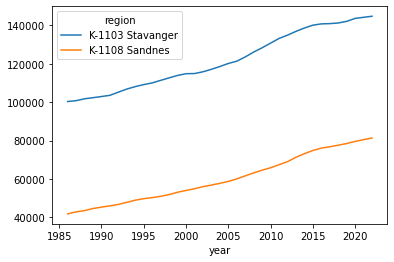

In [27]:
pop_wide[["K-1103 Stavanger", "K-1108 Sandnes"]].plot()

### From wide to long

Now let's imagine that we have a wide dataset, like the one we made above, where we have one category per column. We may often wish to put this into long format. For example, if we want to merge the above dataset with another on both the year and municipality, then we would want the dataset in long format. 

To go from wide to long in pandas we have two options: Stack and melt. Both are covered in the Pandas [reshape userguide](https://pandas.pydata.org/docs/user_guide/reshaping.html). We quickly go through both below. 

We start with melt:

In the wide dataframe we have above, the year is set as the index. We run the command .reset_index() to make the year into a normal column

In [43]:
pop_wide = pop_wide.reset_index()

In [33]:
pop_wide

region,year,K-0301 Oslo,K-1101 Eigersund,K-1103 Stavanger,K-1106 Haugesund,K-1108 Sandnes,K-1111 Sokndal,K-1112 Lund,K-1114 Bjerkreim,K-1119 Hå,...,K-5435 Nordkapp,K-5436 Porsanger - Porsángu - Porsanki,K-5437 Kárásjohka - Karasjok,K-5438 Lebesby,K-5439 Gamvik,K-5440 Berlevåg,K-5441 Deatnu - Tana,K-5442 Unjárga - Nesseby,K-5443 Båtsfjord,K-5444 Sør-Varanger
0,1986,449395,12087,100311,26883,41803,3483,3110,2283,12715,...,4393,4389,2694,1811,1523,1533,3309,1006,2643,9853
1,1987,451345,12159,100761,26884,42887,3487,3109,2305,12802,...,4214,4404,2654,1794,1479,1469,3289,999,2550,9745
2,1988,453730,12203,101733,26947,43525,3507,3113,2320,12868,...,4127,4386,2670,1736,1458,1412,3215,1008,2461,9564
3,1989,456124,12337,102308,27229,44613,3497,3138,2309,12988,...,4061,4443,2658,1761,1450,1374,3201,1030,2401,9579
4,1990,458364,12391,102908,27600,45339,3487,3101,2340,13034,...,3975,4475,2652,1754,1424,1367,3195,1037,2346,9641
5,1991,461644,12398,103536,27788,45983,3453,3086,2373,13022,...,3986,4514,2690,1695,1398,1340,3232,1056,2341,9693
6,1992,467441,12495,105192,28106,46747,3486,3059,2373,13067,...,3994,4511,2726,1652,1388,1344,3268,1056,2321,9758
7,1993,473454,12646,106797,28436,47848,3501,3083,2432,13041,...,3962,4535,2757,1630,1423,1320,3299,1059,2370,9819
8,1994,477781,12721,108072,28670,48956,3508,3071,2437,13409,...,3970,4493,2786,1598,1461,1292,3274,1072,2474,9930
9,1995,483401,12798,109126,29064,49763,3517,3072,2458,13268,...,3914,4461,2788,1578,1455,1324,3272,1048,2547,9913


Then we simply use *year* as the id variable, and the melt function will combine all the values in the other columns into one column with a second columns indicating the category (municipality)

In [34]:
pop_long = pop_wide.melt(id_vars=["year"])
pop_long

,year,region,value
0,1986,K-0301 Oslo,449395
1,1987,K-0301 Oslo,451345
2,1988,K-0301 Oslo,453730
3,1989,K-0301 Oslo,456124
4,1990,K-0301 Oslo,458364
...,...,...,...
13167,2018,K-5444 Sør-Varanger,10171
13168,2019,K-5444 Sør-Varanger,10156
13169,2020,K-5444 Sør-Varanger,10158
13170,2021,K-5444 Sør-Varanger,10103


We could also specify the name of the category and value columns

In [36]:
pop_long = pop_wide.melt(id_vars=["year"], var_name="Municipality", value_name="population")
pop_long

,year,Municipality,population
0,1986,K-0301 Oslo,449395
1,1987,K-0301 Oslo,451345
2,1988,K-0301 Oslo,453730
3,1989,K-0301 Oslo,456124
4,1990,K-0301 Oslo,458364
...,...,...,...
13167,2018,K-5444 Sør-Varanger,10171
13168,2019,K-5444 Sør-Varanger,10156
13169,2020,K-5444 Sør-Varanger,10158
13170,2021,K-5444 Sør-Varanger,10103


We noticed the step we need to do above to change the index of *year* into a normal column in order to reshape using melt. We could instead have kept the year-index and then used the the *stack* function which works with indexes and multindexes. 

Starting by setting year to be the index of our initial wide data set

In [44]:
pop_wide = pop_wide.set_index("year")
pop_wide

region,K-0301 Oslo,K-1101 Eigersund,K-1103 Stavanger,K-1106 Haugesund,K-1108 Sandnes,K-1111 Sokndal,K-1112 Lund,K-1114 Bjerkreim,K-1119 Hå,K-1120 Klepp,...,K-5435 Nordkapp,K-5436 Porsanger - Porsángu - Porsanki,K-5437 Kárásjohka - Karasjok,K-5438 Lebesby,K-5439 Gamvik,K-5440 Berlevåg,K-5441 Deatnu - Tana,K-5442 Unjárga - Nesseby,K-5443 Båtsfjord,K-5444 Sør-Varanger
year,,,,,,,,,,,,,,,,,,,,,
1986,449395,12087,100311,26883,41803,3483,3110,2283,12715,11358,...,4393,4389,2694,1811,1523,1533,3309,1006,2643,9853
1987,451345,12159,100761,26884,42887,3487,3109,2305,12802,11565,...,4214,4404,2654,1794,1479,1469,3289,999,2550,9745
1988,453730,12203,101733,26947,43525,3507,3113,2320,12868,11688,...,4127,4386,2670,1736,1458,1412,3215,1008,2461,9564
1989,456124,12337,102308,27229,44613,3497,3138,2309,12988,11796,...,4061,4443,2658,1761,1450,1374,3201,1030,2401,9579
1990,458364,12391,102908,27600,45339,3487,3101,2340,13034,11788,...,3975,4475,2652,1754,1424,1367,3195,1037,2346,9641
1991,461644,12398,103536,27788,45983,3453,3086,2373,13022,11871,...,3986,4514,2690,1695,1398,1340,3232,1056,2341,9693
1992,467441,12495,105192,28106,46747,3486,3059,2373,13067,11953,...,3994,4511,2726,1652,1388,1344,3268,1056,2321,9758
1993,473454,12646,106797,28436,47848,3501,3083,2432,13041,12202,...,3962,4535,2757,1630,1423,1320,3299,1059,2370,9819
1994,477781,12721,108072,28670,48956,3508,3071,2437,13409,12381,...,3970,4493,2786,1598,1461,1292,3274,1072,2474,9930


In [47]:
pop_long = pop_wide.stack()
pop_long

year  region                  
1986  K-0301 Oslo                 449395
      K-1101 Eigersund             12087
      K-1103 Stavanger            100311
      K-1106 Haugesund             26883
      K-1108 Sandnes               41803
                                   ...  
2022  K-5440 Berlevåg                906
      K-5441 Deatnu - Tana          2821
      K-5442 Unjárga - Nesseby       854
      K-5443 Båtsfjord              2165
      K-5444 Sør-Varanger           9925
Length: 13172, dtype: int64

Notice now that both year and region are set as indexes. We could convert them to be normal columns by using *.reset_index()*. We could also quickly convert back to wide format by using *.unstack()*

In [50]:
pop_wide = pop_long.unstack()
pop_wide

region,K-0301 Oslo,K-1101 Eigersund,K-1103 Stavanger,K-1106 Haugesund,K-1108 Sandnes,K-1111 Sokndal,K-1112 Lund,K-1114 Bjerkreim,K-1119 Hå,K-1120 Klepp,...,K-5435 Nordkapp,K-5436 Porsanger - Porsángu - Porsanki,K-5437 Kárásjohka - Karasjok,K-5438 Lebesby,K-5439 Gamvik,K-5440 Berlevåg,K-5441 Deatnu - Tana,K-5442 Unjárga - Nesseby,K-5443 Båtsfjord,K-5444 Sør-Varanger
year,,,,,,,,,,,,,,,,,,,,,
1986,449395,12087,100311,26883,41803,3483,3110,2283,12715,11358,...,4393,4389,2694,1811,1523,1533,3309,1006,2643,9853
1987,451345,12159,100761,26884,42887,3487,3109,2305,12802,11565,...,4214,4404,2654,1794,1479,1469,3289,999,2550,9745
1988,453730,12203,101733,26947,43525,3507,3113,2320,12868,11688,...,4127,4386,2670,1736,1458,1412,3215,1008,2461,9564
1989,456124,12337,102308,27229,44613,3497,3138,2309,12988,11796,...,4061,4443,2658,1761,1450,1374,3201,1030,2401,9579
1990,458364,12391,102908,27600,45339,3487,3101,2340,13034,11788,...,3975,4475,2652,1754,1424,1367,3195,1037,2346,9641
1991,461644,12398,103536,27788,45983,3453,3086,2373,13022,11871,...,3986,4514,2690,1695,1398,1340,3232,1056,2341,9693
1992,467441,12495,105192,28106,46747,3486,3059,2373,13067,11953,...,3994,4511,2726,1652,1388,1344,3268,1056,2321,9758
1993,473454,12646,106797,28436,47848,3501,3083,2432,13041,12202,...,3962,4535,2757,1630,1423,1320,3299,1059,2370,9819
1994,477781,12721,108072,28670,48956,3508,3071,2437,13409,12381,...,3970,4493,2786,1598,1461,1292,3274,1072,2474,9930
